In [ ]:
!pip install transformers datasets torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.w

In [ ]:
from datasets import load_dataset

dataset = load_dataset("yelp_review_full")

for i in range(0,5):
  print(dataset['train'][i])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'label': 4, 'text': "dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."}
{'label': 1, 'text': "Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  Y

In [ ]:
dataset['train'][0]

{'label': 4,
 'text': "dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."}

In [ ]:
dataset['train'][1]

{'label': 1,
 'text': "Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars."}

In [ ]:
import pandas as pd
df = pd.DataFrame(dataset['train'])

df = df.sample(n=10000, random_state=42)
df

,label,text
177288,0,"First of all i'm not a big fan of buffet, i tr..."
238756,1,Thanks Yelp. I was looking for the words to de...
604225,2,Service was so-so. They were receiving a deliv...
2838,2,Stamoolis Brothers is one of the Strip Distric...
586957,0,I want to give a 2 stars because the service s...
...,...,...
456268,0,Four Hours of my life I'd like to have back!\n...
259135,1,Small stadium and would have great views all a...
496284,2,I think Porktropolis has the BBQ thing nailed....
512684,4,Best CU ever!!! Great customer service!!! Know...


In [ ]:
df.shape
df.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from bs4 import BeautifulSoup
print(stopwords)

{'where', 'seems', 'himself', 'whoever', 'becomes', 'forty', 'afterwards', 'whole', 'seem', "n't", 'of', 'sometime', 'say', 'during', 'their', '’re', 'anyhow', 'thus', 'anywhere', 'everyone', 'nevertheless', 'why', 'whether', 'he', 'everything', 'neither', 'every', 'am', 'might', 'thereupon', 'on', 'something', 'very', 'your', 'behind', 'twenty', 'hereupon', 'nine', 'when', 'only', 'both', 'i', 'one', '’ll', 'hereafter', 'those', 'been', 'three', '‘s', 'were', 'somehow', 'up', 'hence', 'besides', 'whom', "'d", 'made', "'m", "'ve", 'same', 'amongst', 'mostly', 'mine', 'thereafter', 'being', 'alone', 'nowhere', 'another', 'thence', 'however', 'n’t', 'we', 'anyone', 'sometimes', 'eight', 'whose', 'fifty', 'move', 'themselves', 'whereafter', 'most', 'meanwhile', 'herein', 'eleven', 'any', 'whereas', 'noone', 'among', "'re", 'used', 'towards', 'anyway', 'still', 'former', 'done', '’s', 'for', 'go', 'full', '‘m', 'other', 'twelve', 'show', 'after', 'then', 'too', 'sixty', 'yourselves', 'get'

In [ ]:
# đếm số từ trong string
def get_wordcounts(x):
	length = len(str(x).split())
	return length

# đếm số ký tự trong string
def get_charcounts(x):
	s = x.split()
	x = ''.join(s)
	return len(x)

# tính trung bình độ dài của từng word trong văn bản
def get_avg_wordlength(x):
	count = get_charcounts(x)/get_wordcounts(x)
	return count

# Đếm stop word trong văn bản
def get_stopwords_counts(x):
	l = len([t for t in x.split() if t in stopwords])
	return l

# đếm hashtag trong văn bản
def get_hashtag_counts(x):
	l = len([t for t in x.split() if t.startswith('#')])
	return l

# đếm số lần được nhắc đến
def get_mentions_counts(x):
	l = len([t for t in x.split() if t.startswith('@')])
	return l

# đếm số int trong văn bản
def get_digit_counts(x):
	return len([t for t in x.split() if t.isdigit()])

# kiểm tra xem chuỗi có viết hoa hoàn toàn không
def get_uppercase_counts(x):
	return len([t for t in x.split() if t.isupper()])

# xóa thẻ html
def remove_html_tags(x):
	return BeautifulSoup(x, 'lxml').get_text().strip()

In [ ]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")
def has_meaningful_word(text):
    doc = nlp(text)
    for token in doc:
        if not token.is_stop:
            return True
    return False
emotional_keywords = ["great", "wonderful", "excellent", "amazing", "fantastic", "awesome",
                      "superb", "love", "delightful", "splendid", "terrible", "awful",
                      "disgusting", "horrible", "bad", "poor", "disappointing", "dreadful",
                      "unpleasant", "disgusting","nope"]
def has_emotional_keyword(text, keywords):
    for keyword in keywords:
        if keyword in text.lower():
            return True
    return False
def remove_special_characters(text):
    # Xóa các ký tự đặc biệt
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [ ]:
df['word_counts'] = df['text'].apply(lambda x: get_wordcounts(x))
df['char_counts'] = df['text'].apply(lambda x: get_charcounts(x))
df['avg_wordlength'] = df['text'].apply(lambda x: get_avg_wordlength(x))
df['stopwords_counts'] = df['text'].apply(lambda x: get_stopwords_counts(x))
df['mentions_counts'] = df['text'].apply(lambda x: get_mentions_counts(x))
df['hashtag_counts'] = df['text'].apply(lambda x: get_hashtag_counts(x))
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(lambda x: remove_html_tags(x))

df['text'] = df['text'].apply(remove_special_characters)
df['text'] = df['text'].apply(lambda x: x.replace("\n\n", ""))
min_word_count = 5
df_filtered = df[df['word_counts'] >= min_word_count]

df_remaining = df[df['word_counts'] < min_word_count]
df_remaining = df_remaining[df_remaining['text'].apply(has_meaningful_word)]

df = pd.concat([df_filtered, df_remaining])

<ipython-input-8-e712f0056f57>:42: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [ ]:
df

,label,text,word_counts,char_counts,avg_wordlength,stopwords_counts,mentions_counts,hashtag_counts
177288,0,first of all im not a big fan of buffet i trie...,62,248,4.000000,29,0,0
238756,1,thanks yelp i was looking for the words to des...,199,867,4.356784,101,0,0
604225,2,service was soso they were receiving a deliver...,39,155,3.974359,22,0,0
2838,2,stamoolis brothers is one of the strip distric...,189,890,4.708995,79,0,0
586957,0,i want to give a 2 stars because the service s...,105,471,4.485714,45,0,0
...,...,...,...,...,...,...,...,...
588629,1,overpriced and over hyped,4,23,5.750000,2,0,0
152976,3,best pork ribs ever,4,16,4.000000,1,0,0
574137,0,yuck,1,7,7.000000,0,0,0
435678,0,shady hidden fess,4,19,4.750000,0,0,0


In [ ]:
print(df['word_counts'].describe())

count    10000.00000
mean       133.06270
std        124.43514
min          1.00000
25%         51.00000
50%         98.00000
75%        172.00000
max        998.00000
Name: word_counts, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
def plot_histogram(dataframe):
  plt.figure(figsize=(10, 6))
  plt.hist(dataframe['word_counts'], bins=50, edgecolor='black')
  plt.title('Histogram of Word Counts')
  plt.xlabel('Number of Words')
  plt.ylabel('Frequency')
  plt.show()

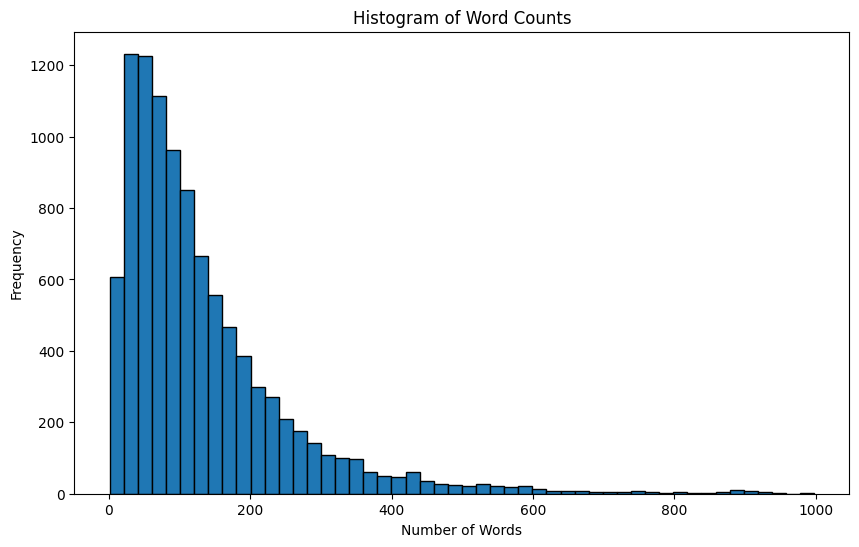

In [ ]:
plot_histogram(df)

In [ ]:
df[df['word_counts']>512]['text'].count()

210

In [ ]:
df[df['word_counts']>512]['text']

133480    on 28 june 2013 i checked into the riviera hot...
248712    first thank you to yelp gabi and sol y sombra ...
135909    famous forn steaksnnbuzzn prime ribnni triedn ...
151035    let me just preface this review by saying i re...
491686    this may be a buffet for folks who like my hub...
                                ...                        
538986    youll find public house tucked away on the fir...
596957    before we even got insidencame here opening we...
95890     people love to rag on desert sky mall like its...
278997    a word of advice when dining at claim jumpers ...
380380    ive been wanting to go to an on the border res...
Name: text, Length: 210, dtype: object

In [ ]:
df[df['word_counts']==1]['text'].count()

5

In [ ]:
df[df['word_counts']==1]['text']

254260       yuck
590199    regular
135615     gloppy
451901      gross
574137       yuck
Name: text, dtype: object

In [ ]:
df

,label,text,word_counts,char_counts,avg_wordlength,stopwords_counts,mentions_counts,hashtag_counts
177288,0,first of all im not a big fan of buffet i trie...,62,248,4.000000,29,0,0
238756,1,thanks yelp i was looking for the words to des...,199,867,4.356784,101,0,0
604225,2,service was soso they were receiving a deliver...,39,155,3.974359,22,0,0
2838,2,stamoolis brothers is one of the strip distric...,189,890,4.708995,79,0,0
586957,0,i want to give a 2 stars because the service s...,105,471,4.485714,45,0,0
...,...,...,...,...,...,...,...,...
588629,1,overpriced and over hyped,4,23,5.750000,2,0,0
152976,3,best pork ribs ever,4,16,4.000000,1,0,0
574137,0,yuck,1,7,7.000000,0,0,0
435678,0,shady hidden fess,4,19,4.750000,0,0,0


In [ ]:
from transformers import pipeline, T5Tokenizer
import torch

specific_aspects = ["food", "service", "ambiance", "price", "location"]
device = 0 if torch.cuda.is_available() else -1
summarizer = pipeline('summarization', model='t5-small', tokenizer='t5-small', device=device)
tokenizer = T5Tokenizer.from_pretrained('t5-small')

def summarize_text(text, max_length=150, min_length=30):
    summarized = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
    return summarized[0]['summary_text']

def extract_aspect_sentences(text, aspect_keywords):
    sentences = text.split('. ')
    relevant_sentences = []

    for sentence in sentences:
        for keyword in aspect_keywords:
            if keyword.lower() in sentence.lower():
                relevant_sentences.append(sentence)
                break

    return '. '.join(relevant_sentences) + '.'

def summarize_long_texts_with_aspect(dataset, column='text', aspect_keywords=[], max_length=150, min_length=30, token_limit=512):
    summarized_texts = []
    for text in dataset[column]:
        tokenized_text = tokenizer.tokenize(text)
        if len(tokenized_text) > token_limit:
            aspect_text = extract_aspect_sentences(text, aspect_keywords)
            tokenized_aspect_text = tokenizer.tokenize(aspect_text)
            if len(tokenized_aspect_text) > token_limit:
                summary = summarize_text(aspect_text, max_length=max_length, min_length=min_length)
            else:
                summary = aspect_text
        else:
            summary = text
        print(summary)
        summarized_texts.append(summary)
    return summarized_texts


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
from datasets import Dataset
def create_dataset(dataframe, text_column, label_column):
    """
    Converts two columns of text and labels from a DataFrame into a dataset.

    Args:
        dataframe (pandas.DataFrame): The input DataFrame containing the text and label columns.
        text_column (str): The name of the column containing the text data.
        label_column (str): The name of the column containing the labels.

    Returns:
        datasets.Dataset: The resulting dataset containing text and labels.
    """

    # Extract text and labels from DataFrame
    text = dataframe[text_column].tolist()
    labels = dataframe[label_column].tolist()

    # Create a dictionary with text and labels
    data = {"text": text, "label": labels}

    # Convert to Hugging Face Dataset format
    return Dataset.from_dict(data)
dataset = create_dataset(df, "text", "label")

In [ ]:
dataset[0]

In [ ]:
sum_text = summarize_long_texts_with_aspect(dataset, column='text', aspect_keywords=specific_aspects, max_length=150, min_length=30, token_limit=512)

Token indices sequence length is longer than the specified maximum sequence length for this model (551 > 512). Running this sequence through the model will result in indexing errors


first of all im not a big fan of buffet i tried it because we got a 50 credit for staying here at monte carlo in las vegas and my friend wanted it so i gave it a chance decent taste and there wasnt enough variety of food service wasnt that great either so it still doesnt change my mind about buffet
thanks yelp i was looking for the words to describe this place and meh seems fittingnnplayboy club is located under moon at the palms we got in for free thanks to the promoter hookup we got first you cant take glassware from moon down to playboy security will take your glass and transfer the contents over to a plastic cocktail cup making you feel like you are a four year old when all of the big kids downstairs have real glasswarennthere are a couple of tables here to gamble along with some video poker machines at the bar in the back of the club the atmosphere here is relaxed and seems to cater to an older 40 crowd the bunnies here looked miserable and complained about working you are a playb

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Streaming output truncated to the last 5000 lines.
very slow service over 55 minutes to check out  lady did not know what shes doing
previously i gave 45 stars to this place and i have the urge to correct it now its 55 if i can add another star i would because this place is very very special to me their ramens have improved a lot and i like the fact bachi  shoku is now the same restaurant my hubby can eat his burger while i eat my noodles everyone is happy more seatings modern decor same friendly services crazy busy kitchen whats not to love about this place the only request bring back fried chicken from original shoku please  their drumstick was out of this world and cfc is just not the same
diagnosis delicious nnive heard this place was really good but i was still suprised with how great the grub is i recommend the secret bbq chicken sandwich the thyme fries are killer and the fruit salad was yummy too  prices were reasonable cool vibe cant wait to go back and try something else
amor

In [ ]:
print(sum_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
dataset = dataset.add_column('summarized_text', sum_text)

In [ ]:
dataset[0]

{'text': 'first of all im not a big fan of buffet i tried it because we got a 50 credit for staying here at monte carlo in las vegas and my friend wanted it so i gave it a chance decent taste and there wasnt enough variety of food service wasnt that great either so it still doesnt change my mind about buffet',
 'label': 0,
 'summarized_text': 'first of all im not a big fan of buffet i tried it because we got a 50 credit for staying here at monte carlo in las vegas and my friend wanted it so i gave it a chance decent taste and there wasnt enough variety of food service wasnt that great either so it still doesnt change my mind about buffet'}

In [ ]:
dataset

Dataset({
    features: ['text', 'label', 'summarized_text'],
    num_rows: 10000
})

In [ ]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_aspects(text, aspects):
    doc = nlp(text)
    extracted_aspects = []
    for chunk in doc.noun_chunks:
        for aspect in aspects:
            if aspect in chunk.text.lower():
                extracted_aspects.append(aspect)
    return extracted_aspects

def preprocess_reviews(reviews, aspects):
    processed_reviews = []
    for review in reviews:
        text = review['text']
        extracted_aspects = extract_aspects(text, aspects)
        sentiment = 1 if review['label'] >= 3 else 0  # 1 for positive, 0 for negative
        for aspect in extracted_aspects:
            processed_reviews.append({'text': text, 'aspect': aspect, 'sentiment': sentiment})
    return processed_reviews

train_reviews = preprocess_reviews(dataset, specific_aspects)
import pandas as pd

train_df = pd.DataFrame(train_reviews)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import Dataset

class YelpDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Prepare the datasets
train_labels = train_df['sentiment'].tolist()
train_dataset = YelpDataset(train_encodings, train_labels)



In [ ]:
import random

# Lấy ra số lượng bản ghi mà bạn muốn
sample_size = 500

# Lấy chỉ mục của các bản ghi một cách ngẫu nhiên
random_indices = random.sample(range(len(pre_dataset['test'])), sample_size)

# Lấy các bản ghi từ chỉ mục đã chọn
random_records = [pre_dataset['test'][index] for index in random_indices]


In [ ]:
random_records

[{'label': 2,
  'text': "I struggle with this one quite a bit.  I love the revitalization of Biltmore Fashion Park - although I am terribly sad that a quarter of it was torn down for a parking lot.  The Sharper Image will be missed.\\n\\nSomehow, I don't see how this place will last.  All of the shops are completely adorable - and most are local, which I am all for!  But the price point at most is a tad ridiculous - $1200 for a beach cruiser?  In Phoenix?  Where your safest best for bike riding is along the canal and it is probably too hot anyways?  Maybe.  \\n\\nI can imagine this a great place to pick up some cute original gifts or decor items for the house.  They do have a candy store that offers some of the old school treats too, and they have kept up with inflation. But as far as a shopping destination? I'm not quite feeling it since it lacks in variety, functionality and accessibility to the masses."},
 {'label': 1,
  'text': 'It was just okay.  We\'ve been to numerous Sushi rest

In [ ]:
test_reviews = preprocess_reviews(random_records, specific_aspects)
test_df = pd.DataFrame(test_reviews)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True)
test_labels = test_df['sentiment'].tolist()
test_dataset = YelpDataset(test_encodings, test_labels)

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install accelerate -U

In [ ]:
!pip install transformers[torch]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(example):
  labels = example.label_ids
  preds = example.predictions.argmax(-1)

  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)

  return {'accuracy': acc, "f1": f1}

from transformers import Trainer, TrainingArguments
batch_size = 16
model_name = "absa"

args = TrainingArguments(
    output_dir = "output",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size = batch_size,
    learning_rate = 2e-5,
    num_train_epochs = 5,
    evaluation_strategy = 'epoch',
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(model=model,
                  args=args,
                  train_dataset = dataset,
                  eval_dataset = test_dataset,
                  compute_metrics=compute_metrics,
                  tokenizer = tokenizer)
trainer.train()
model_save_path = '/content/drive/MyDrive/CS224N/distilbert_finetuned_setiment'
trainer.save_model(model_save_path)


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [ ]:
import torch
from torch.utils.data import DataLoader, RandomSampler
from transformers import AdamW, get_linear_schedule_with_warmup

# Khởi tạo optimizer và scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * num_train_epochs)

# Vòng lặp huấn luyện
model.train()
for epoch in range(num_train_epochs):
    total_loss = 0
    for batch in train_dataloader:
        optimizer.zero_grad()

        inputs = tokenizer(batch['text'], padding=True, truncation=True, return_tensors="pt")
        labels = torch.tensor(batch['label'])

        inputs = {key: value.to(device) for key, value in inputs.items()}
        labels = labels.to(device)

        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}/{num_train_epochs}, Average Training Loss: {avg_train_loss}")

# Lưu mô hình
model_save_path = '/content/drive/MyDrive/CS224N/distilbert_finetuned_setiment'
torch.save(model.state_dict(), model_save_path)


In [ ]:
test_reviews

NameError: name 'test_reviews' is not defined

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer

class ABSADataSet(Dataset):
    def __init__(self, texts, aspects, sentiments):
        self.texts = texts
        self.aspects = aspects
        self.sentiments = sentiments
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        aspect = self.aspects[idx]
        sentiment = self.sentiments[idx]

        inputs = self.tokenizer.encode_plus(
            text,
            aspect,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(sentiment, dtype=torch.long)
        }

# Sample Data
texts = ["The food was great but the service was terrible.", "The location is fantastic."]
aspects = ["food", "service", "location"]
sentiments = [1, 0, 1]

train_dataset = ABSADataSet(texts, aspects, sentiments)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
from transformers import BertForSequenceClassification, AdamW

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e